In [24]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
dataset_path = '/content/metadata.csv'

In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv(dataset_path)

In [29]:
df.head()

,videoname,original_width,original_height,label,original
0,aznyksihgl.mp4,129,129,FAKE,xnojggkrxt.mp4
1,gkwmalrvcj.mp4,129,129,FAKE,hqqmtxvbjj.mp4
2,lxnqzocgaq.mp4,223,217,FAKE,xjzkfqddyk.mp4
3,itsbtrrelv.mp4,186,186,FAKE,kqvepwqxfe.mp4
4,ddvgrczjno.mp4,155,155,FAKE,pluadmqqta.mp4


In [30]:
df.tail()

,videoname,original_width,original_height,label,original
95629,rqcsjlsmiz.mp4,129,129,FAKE,pbsccacgff.mp4
95630,xjmnerypjf.mp4,90,90,FAKE,qrjydgidga.mp4
95631,hnewpzhihy.mp4,75,75,FAKE,vabhbfiifl.mp4
95632,okbarlnmwm.mp4,268,267,FAKE,uqaaspbgtz.mp4
95633,asddammewq.mp4,90,90,FAKE,yfjkgiynbi.mp4


In [31]:
df.shape

(95634, 5)

In [32]:
df.columns

Index(['videoname', 'original_width', 'original_height', 'label', 'original'], dtype='object')

In [33]:
df.duplicated().sum()

0

In [34]:
df.isnull().sum()

,0
videoname,0
original_width,0
original_height,0
label,0
original,16293


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95634 entries, 0 to 95633
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   videoname        95634 non-null  object
 1   original_width   95634 non-null  int64 
 2   original_height  95634 non-null  int64 
 3   label            95634 non-null  object
 4   original         79341 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.6+ MB


In [36]:
df.nunique()

,0
videoname,95634
original_width,31
original_height,34
label,2
original,16955


In [37]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['videoname', 'label', 'original'], dtype='object')

Numerical type columns:
Index(['original_width', 'original_height'], dtype='object')


In [38]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [39]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [40]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['label']
Non-Categorical Features: ['videoname', 'original']
Discrete Features: []
Continuous Features: ['original_width', 'original_height']


In [41]:
df = df.fillna("Not Available")

In [42]:
for i in categorical:
    print(i,':', df[i].unique())
    print()

label : ['FAKE' 'REAL']



In [43]:
for i in categorical:
    print(df[i].value_counts())
    print()

label
FAKE    79341
REAL    16293
Name: count, dtype: int64



In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import warnings
warnings.filterwarnings('ignore')

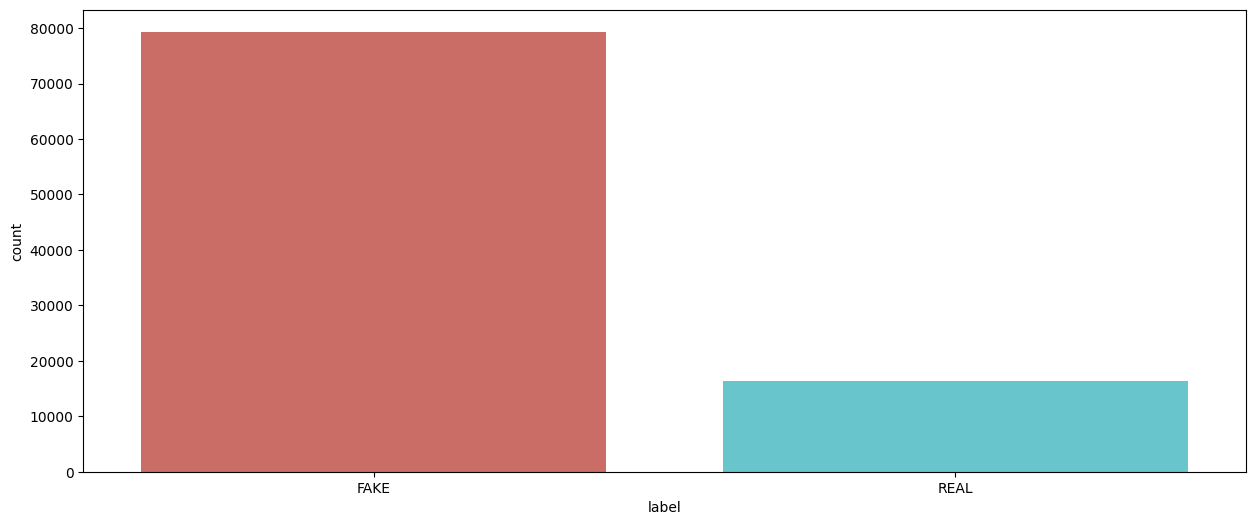

In [46]:
for i in categorical:
    plt.figure(figsize=(15,6))
    sns.countplot(x = df[i], data = df, palette = 'hls')
    plt.show()

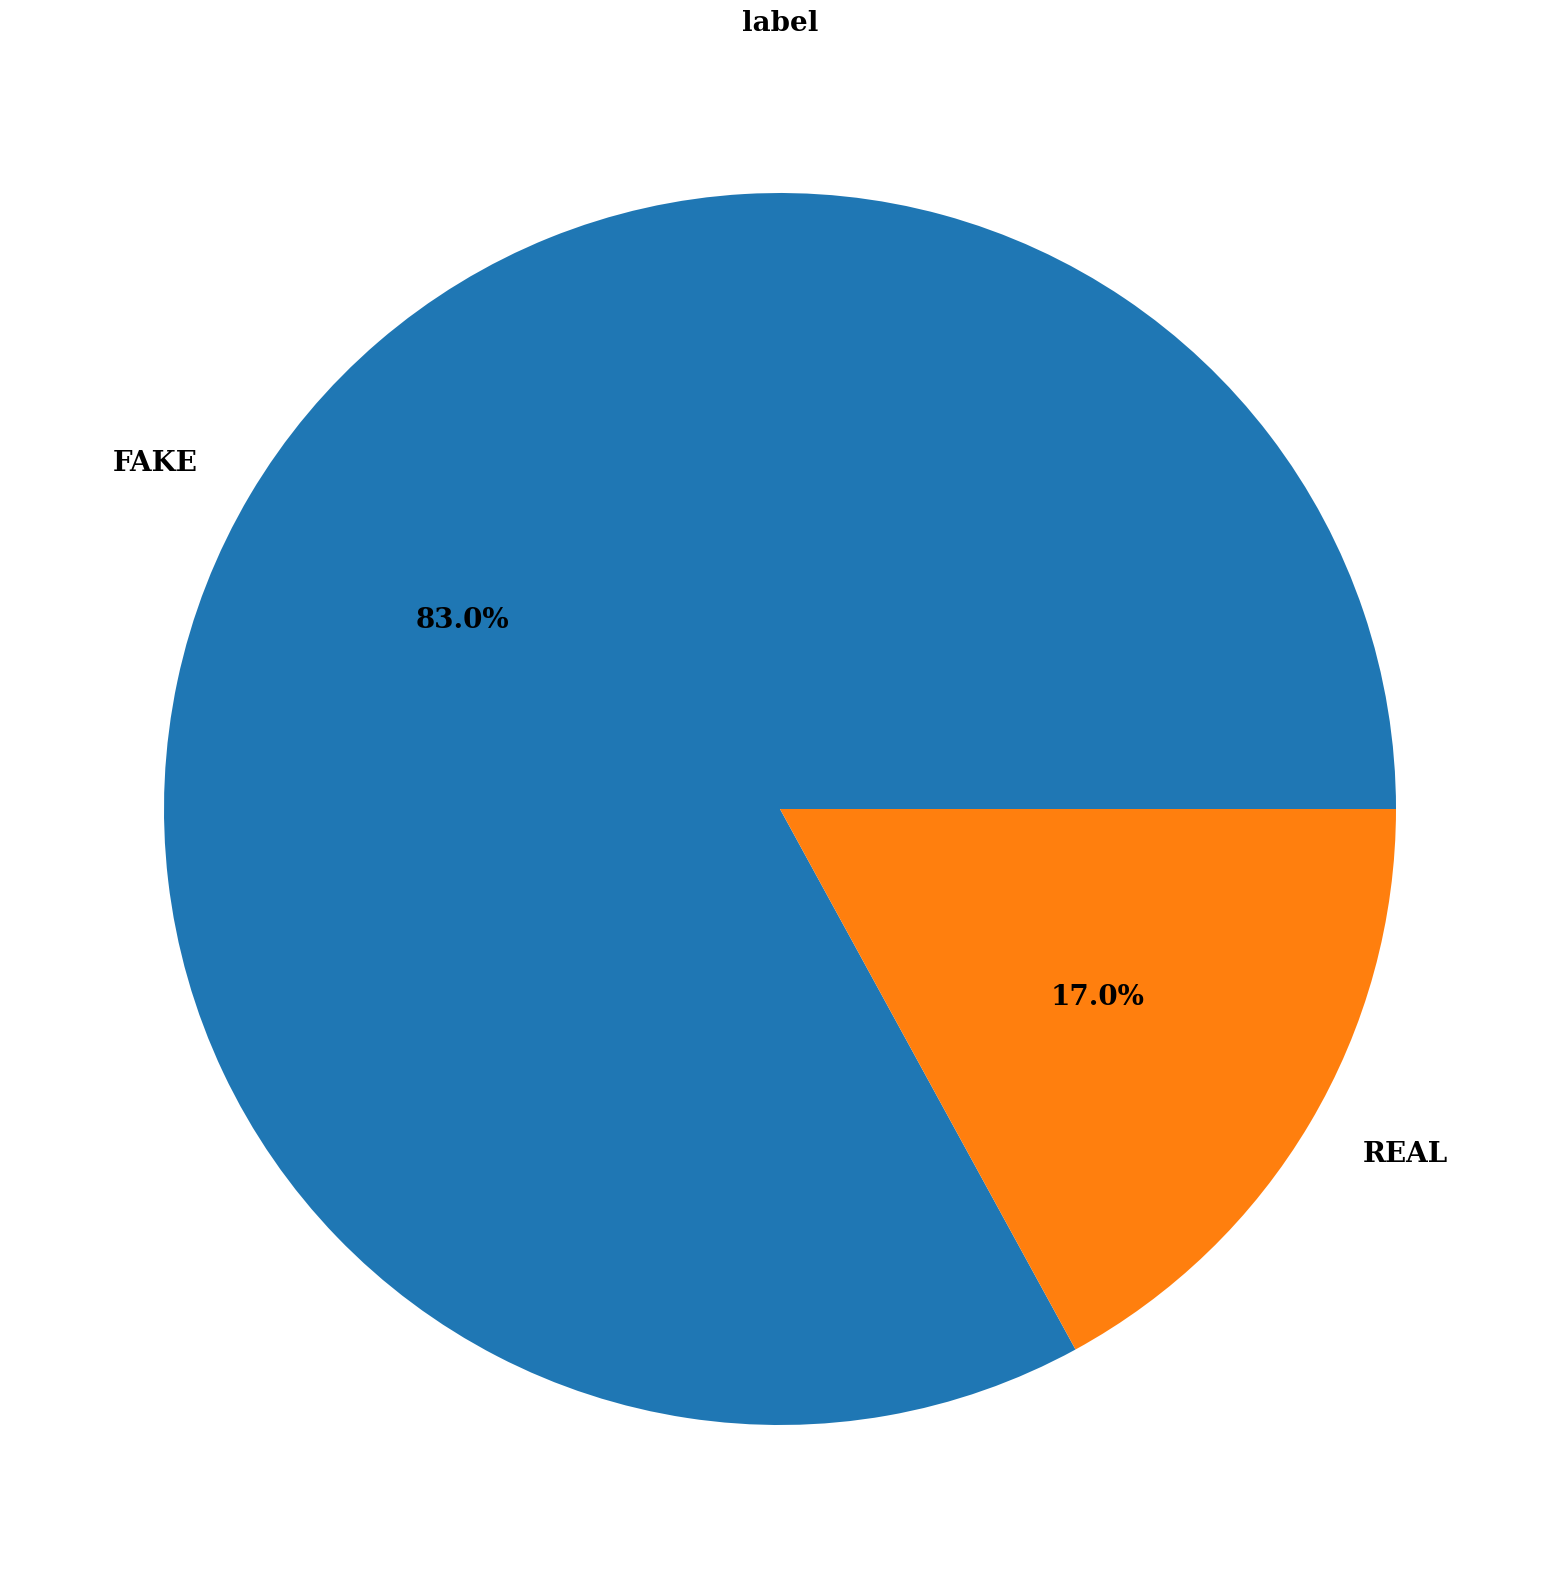

In [47]:
for i in categorical:
    plt.figure(figsize=(30,20))
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index,
            autopct='%1.1f%%', textprops={ 'fontsize': 20,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
    hfont = {'fontname':'serif', 'weight': 'bold'}
    plt.title(i, size=20, **hfont)
    plt.show()

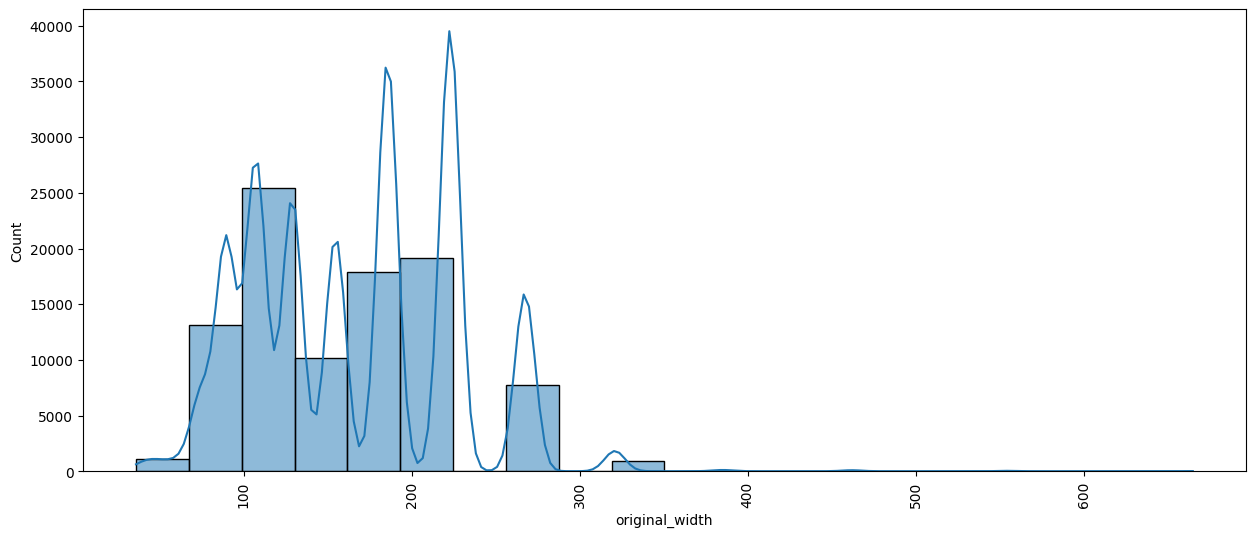

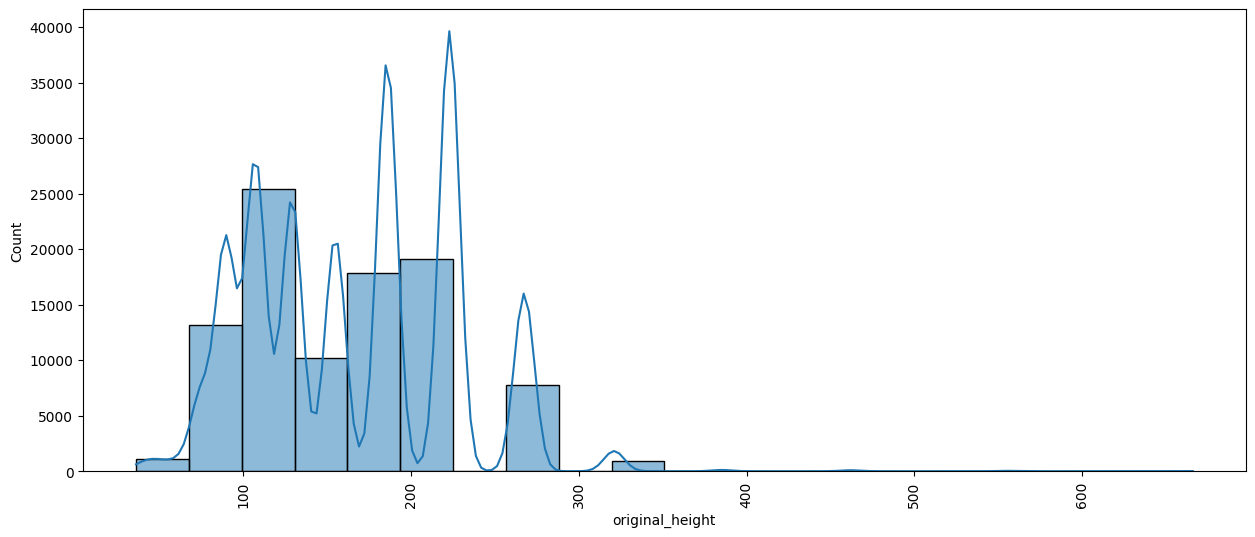

In [48]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

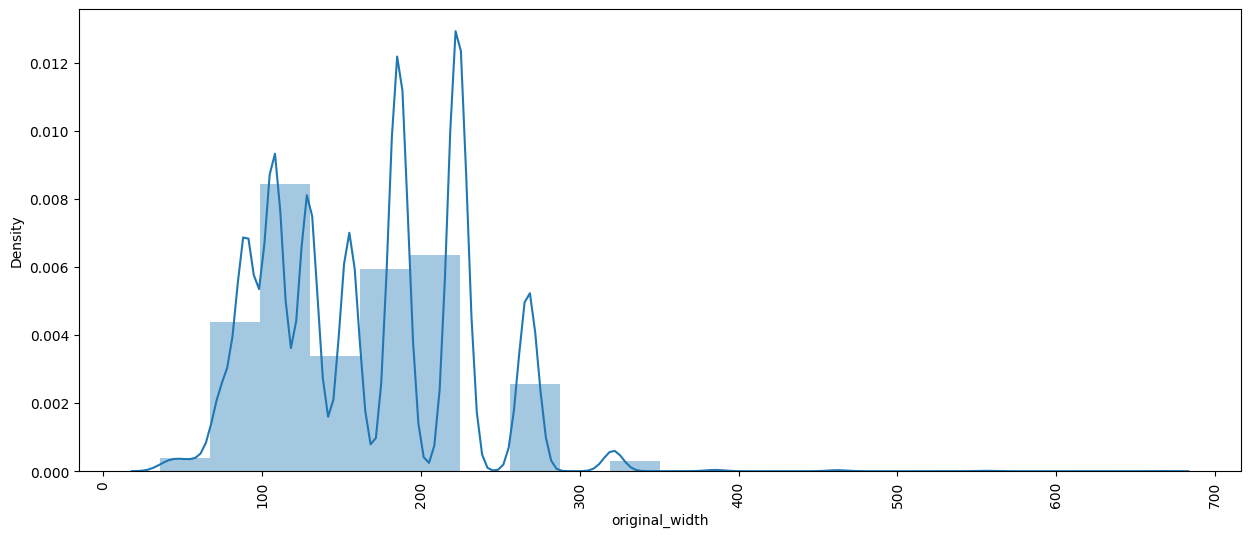

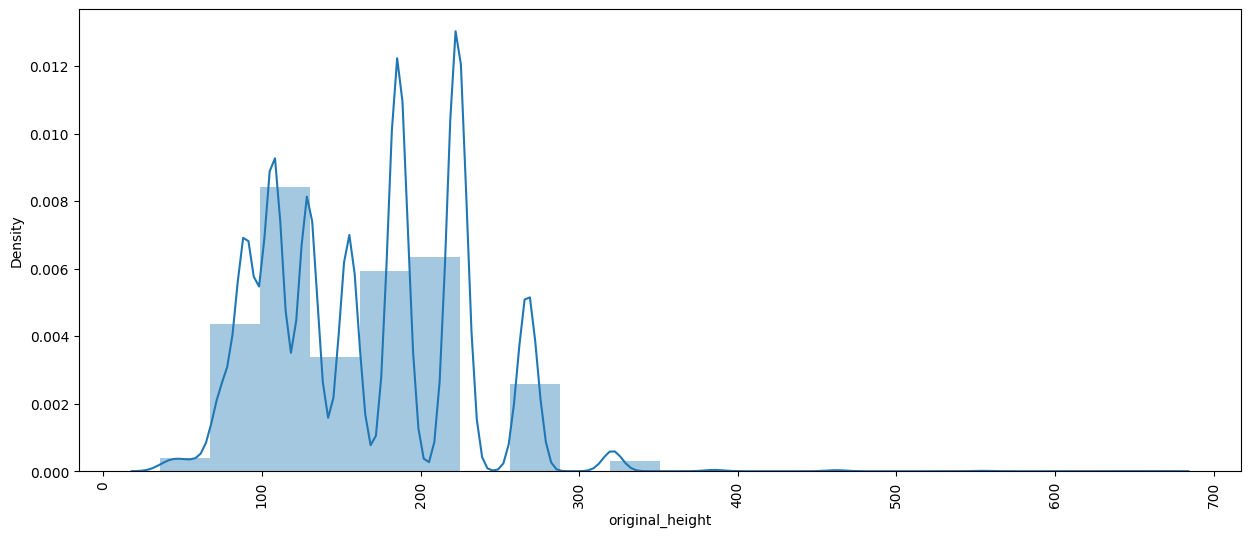

In [49]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], kde = True, bins = 20)
    plt.xticks(rotation = 90)
    plt.show()

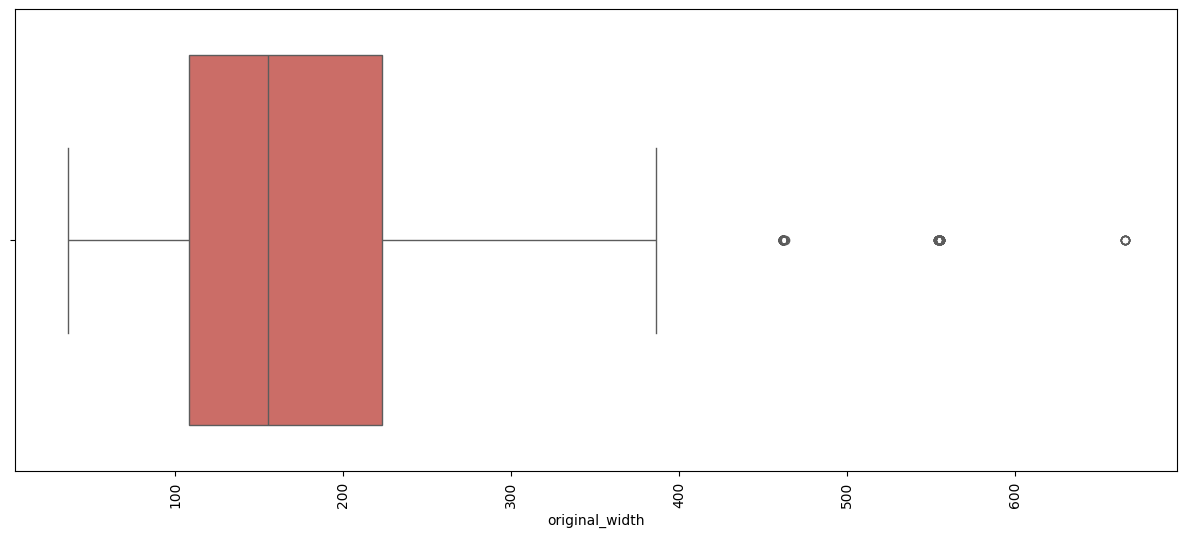

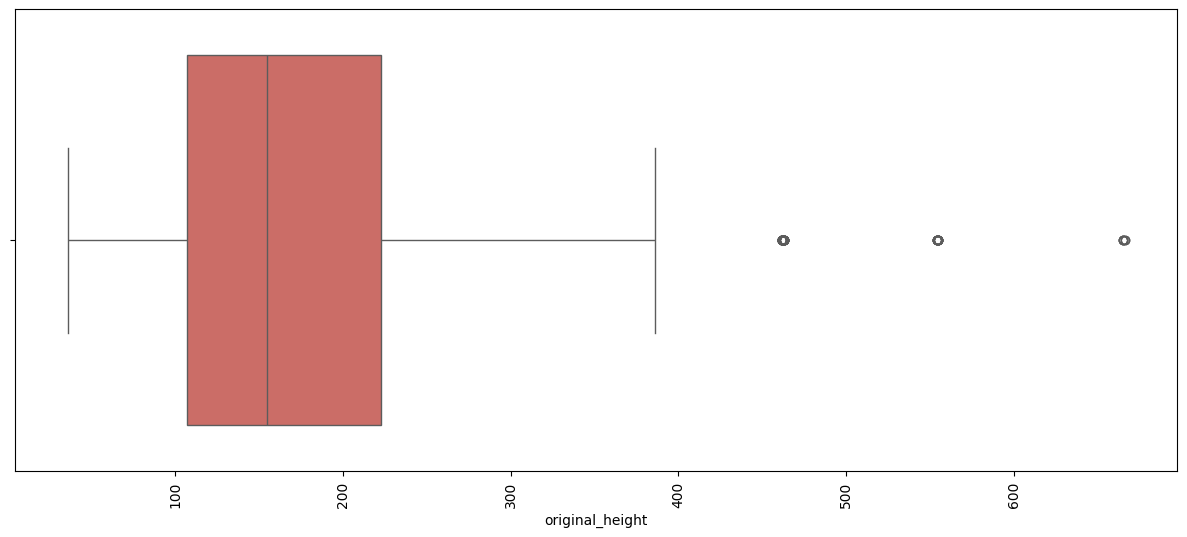

In [50]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x = df[i],data = df, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

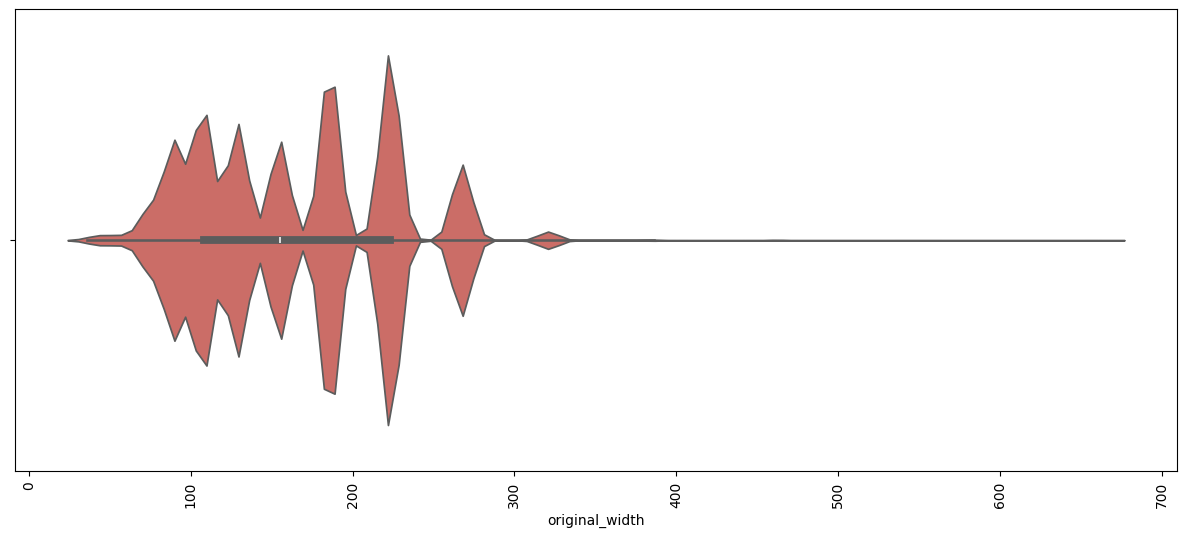

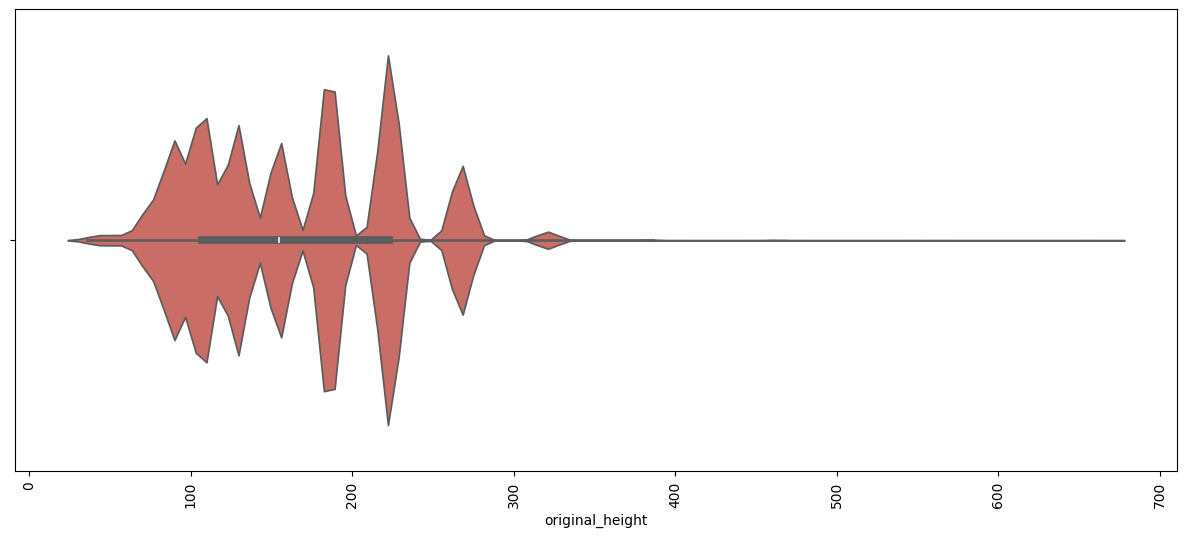

In [51]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(x = df[i],data = df, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

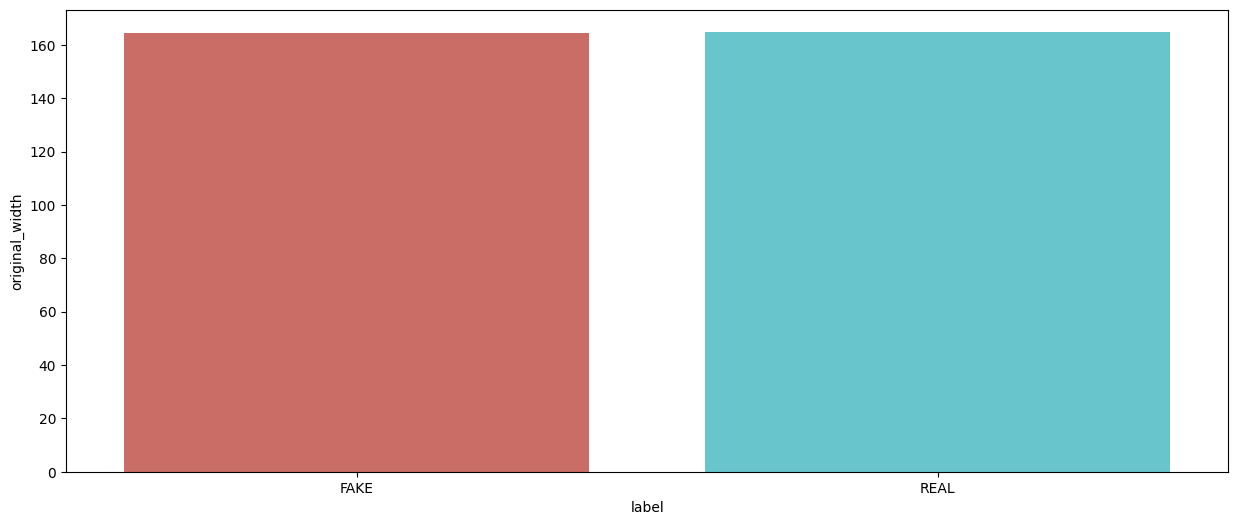

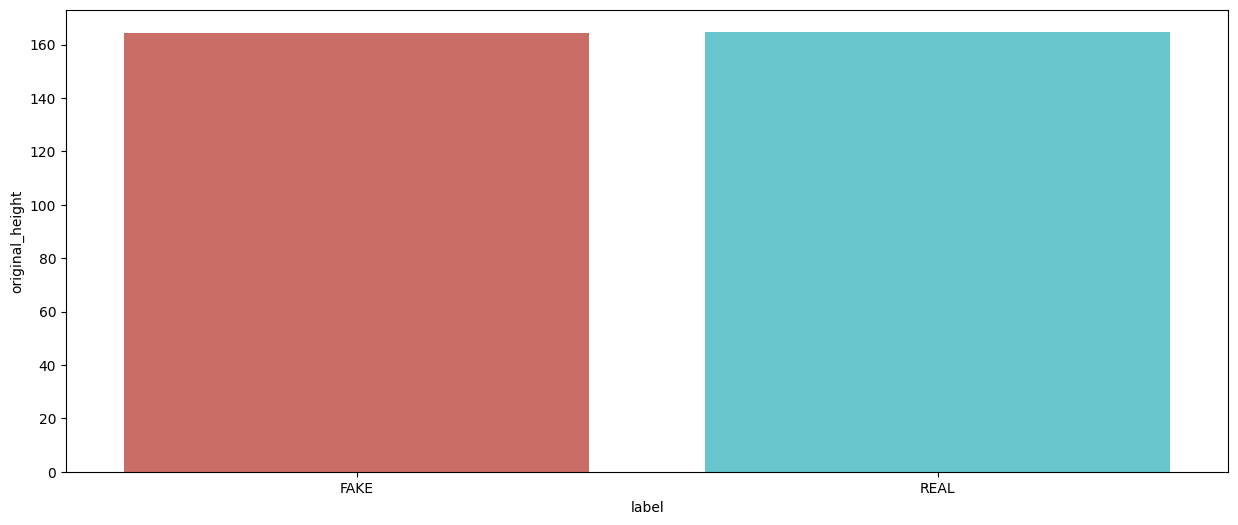

In [52]:
for i in categorical:
    for j in numerical_columns:
        plt.figure(figsize=(15,6))
        sns.barplot(x = df[i], y = df[j], data = df, ci = None, palette = 'hls')
        plt.show()

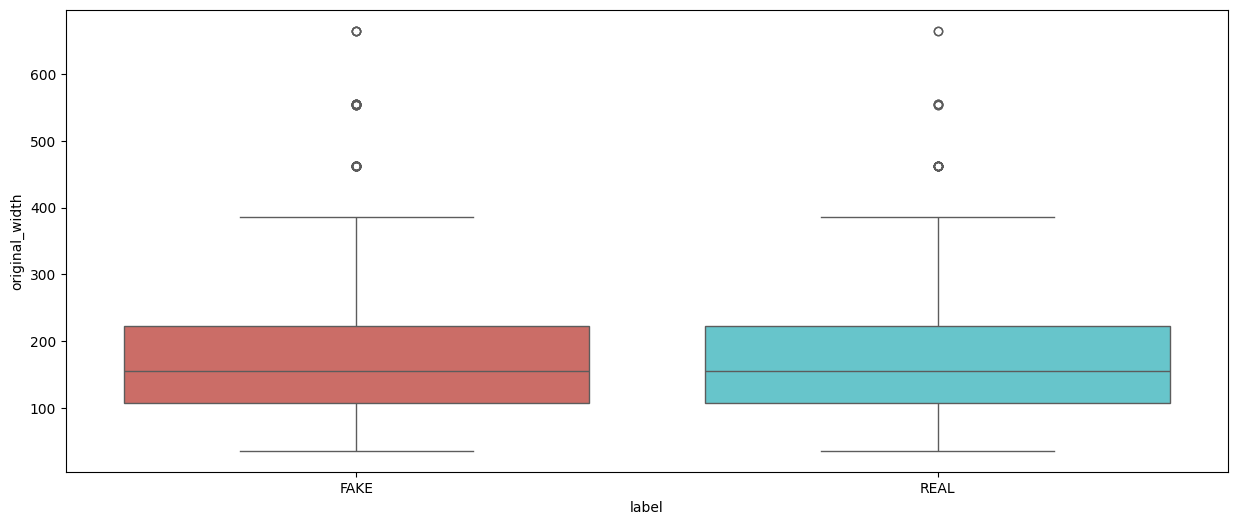

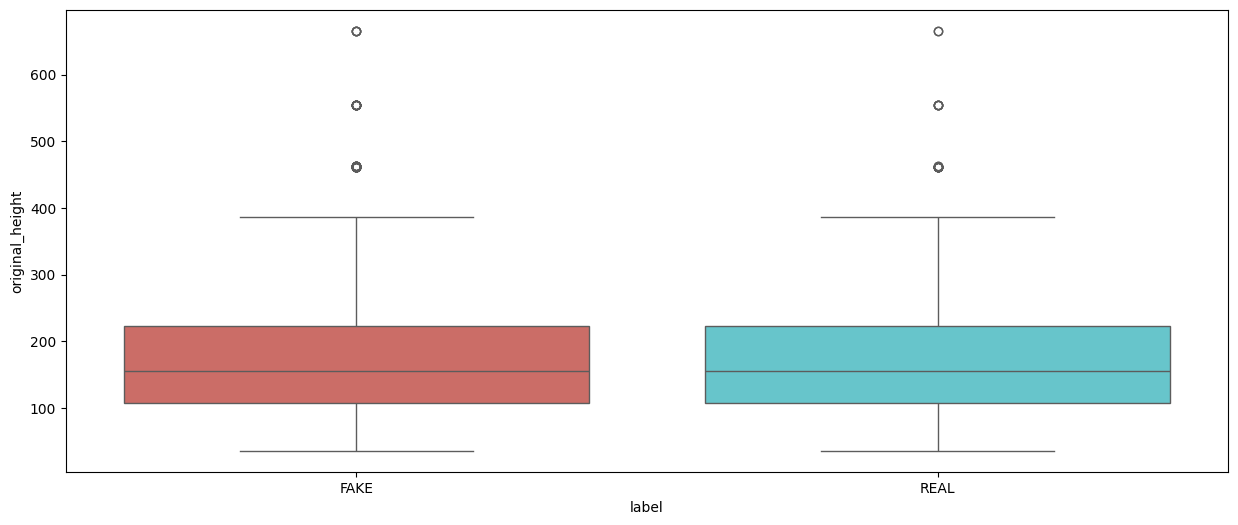

In [53]:
for i in categorical:
    for j in numerical_columns:
        plt.figure(figsize=(15,6))
        sns.boxplot(x = df[i], y = df[j], data = df, palette = 'hls')
        plt.show()

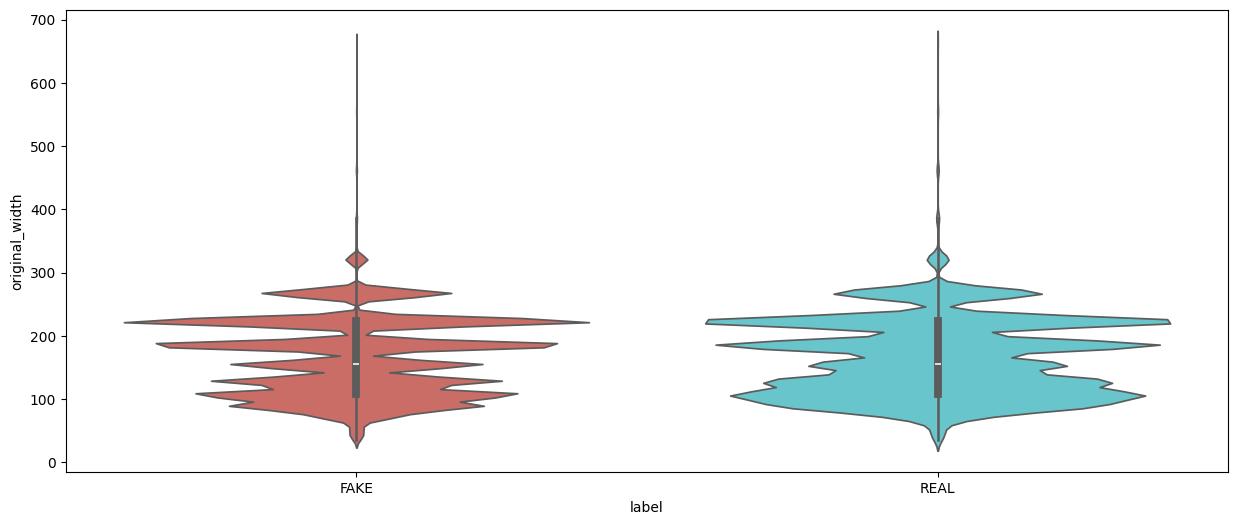

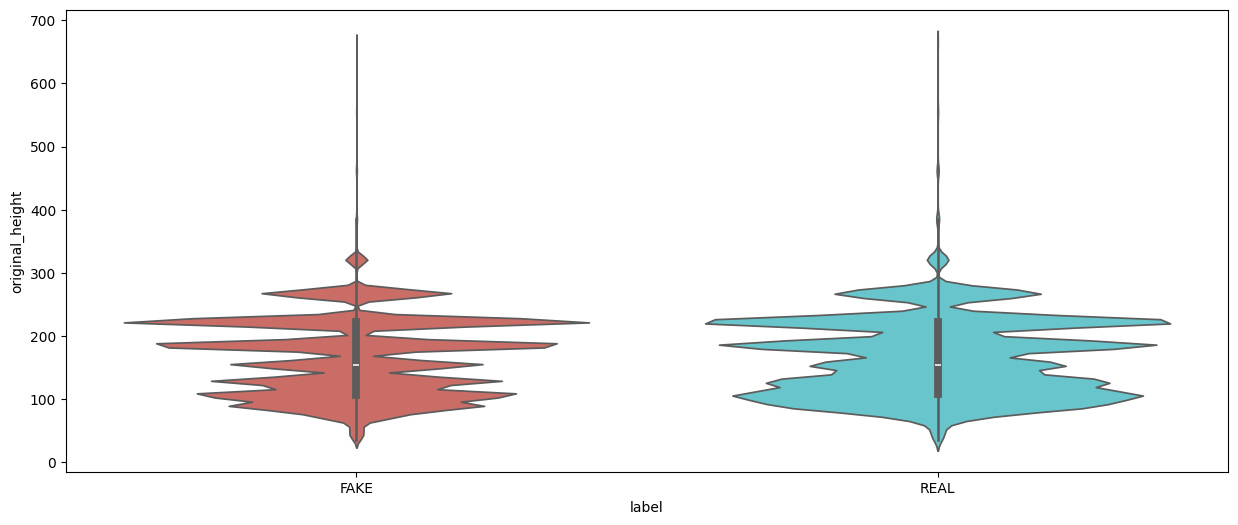

In [54]:
for i in categorical:
    for j in numerical_columns:
        plt.figure(figsize=(15,6))
        sns.violinplot(x = df[i], y = df[j], data = df, palette = 'hls')
        plt.show()

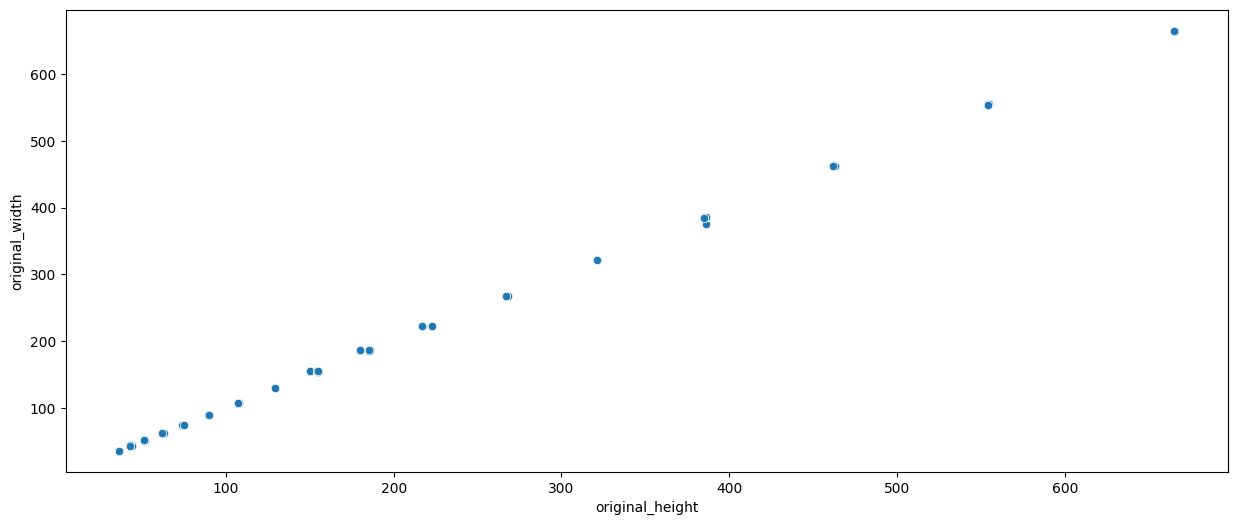

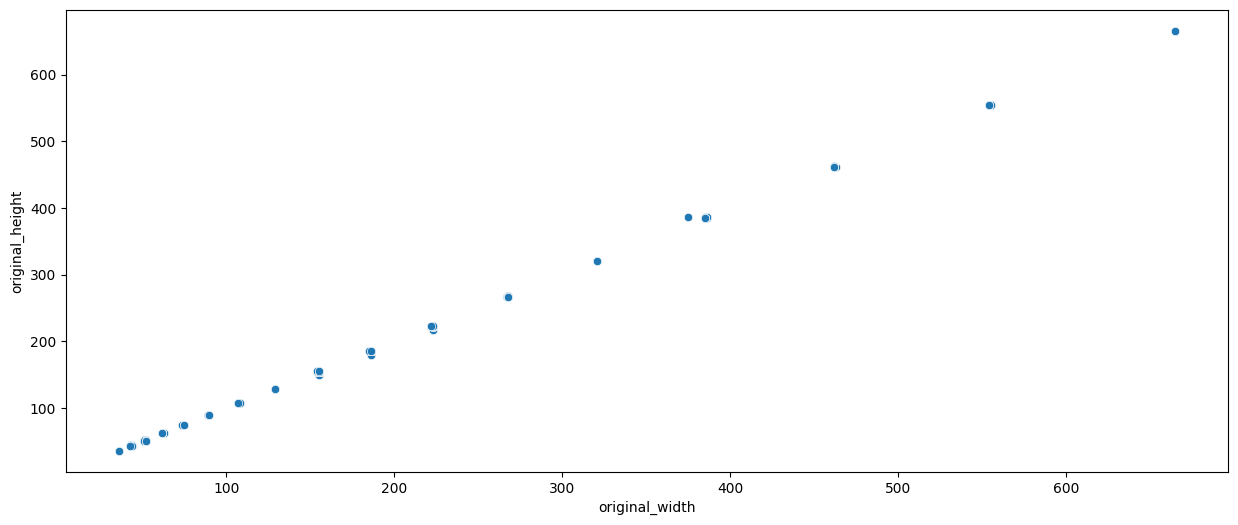

In [55]:
for i in numerical_columns:
    for j in numerical_columns:
        if i != j:
            plt.figure(figsize=(15,6))
            sns.scatterplot(x = df[j], y = df[i], data = df, palette = 'hls')
            plt.show()

In [56]:
real_df = df[df["label"] == "REAL"]
fake_df = df[df["label"] == "FAKE"]
sample_size = 10000

real_df = real_df.sample(sample_size, random_state=42)
fake_df = fake_df.sample(sample_size, random_state=42)

sample_meta = pd.concat([real_df, fake_df])

In [57]:
from sklearn.model_selection import train_test_split

Train_set, Test_set = train_test_split(sample_meta,test_size=0.2,random_state=42,stratify=sample_meta['label'])
Train_set, Val_set  = train_test_split(Train_set,test_size=0.3,random_state=42,stratify=Train_set['label'])

In [58]:
Train_set.shape,Val_set.shape,Test_set.shape

((11200, 5), (4800, 5), (4000, 5))

In [59]:
import cv2

In [60]:
import os

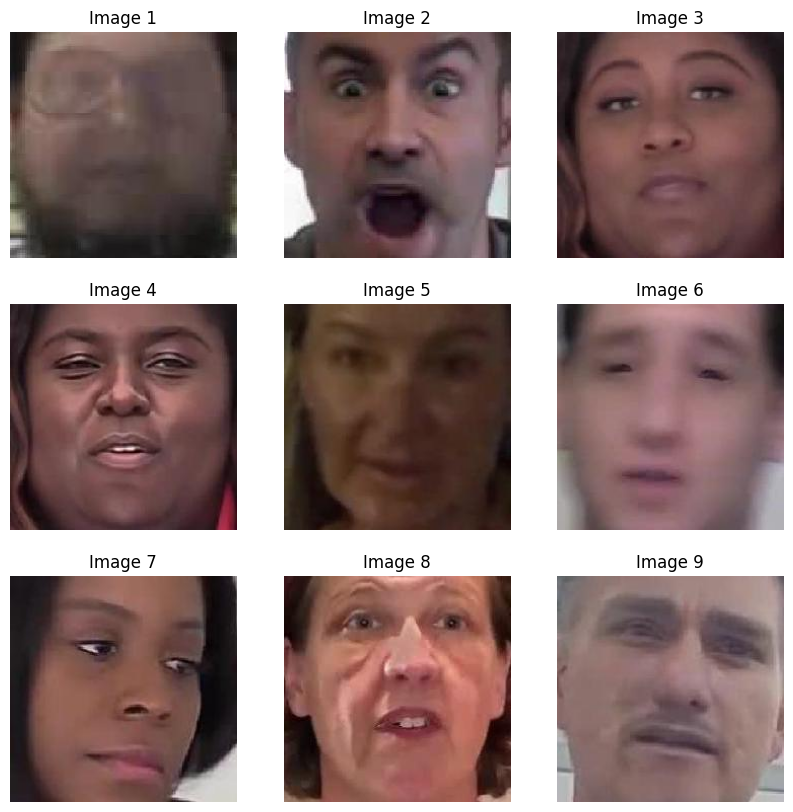

In [62]:
image_path = '/content/drive/MyDrive/faces_224/'

image_files = os.listdir(image_path)

image_files.sort()

selected_images = image_files[:9]

plt.figure(figsize=(10, 10))

for index, image_file in enumerate(selected_images):
    image = cv2.imread(os.path.join(image_path, image_file))

    plt.subplot(3, 3, index + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Image {index + 1}')
    plt.axis('off')

plt.show()

In [63]:
for i, image_file in enumerate(image_files[:10]):
    image = cv2.imread(os.path.join(image_path, image_file))
    if image is not None:
        height, width, _ = image.shape
        print(f"Resolution of image {i+1}: {width} x {height}")
    else:
        print(f"Error reading image {i+1}")

if len(image_files) < 10:
    print(f"Only {len(image_files)} images found in the directory.")

Resolution of image 1: 224 x 224
Resolution of image 2: 224 x 224
Resolution of image 3: 224 x 224
Resolution of image 4: 224 x 224
Resolution of image 5: 224 x 224
Resolution of image 6: 224 x 224
Resolution of image 7: 224 x 224
Resolution of image 8: 224 x 224
Resolution of image 9: 224 x 224
Resolution of image 10: 224 x 224


Image aaagqkcdis.jpg not found in Train_set
Image aaaoqepxnf.jpg not found in Train_set
Image aaavbjopeq.jpg not found in Train_set
Image aabdnomlru.jpg not found in Train_set
Image aabdogagch.jpg not found in Train_set
Image aabgnwnqba.jpg not found in Train_set
Image aabjfjbpir.jpg not found in Train_set
Image aabkwhhgwv.jpg not found in Train_set


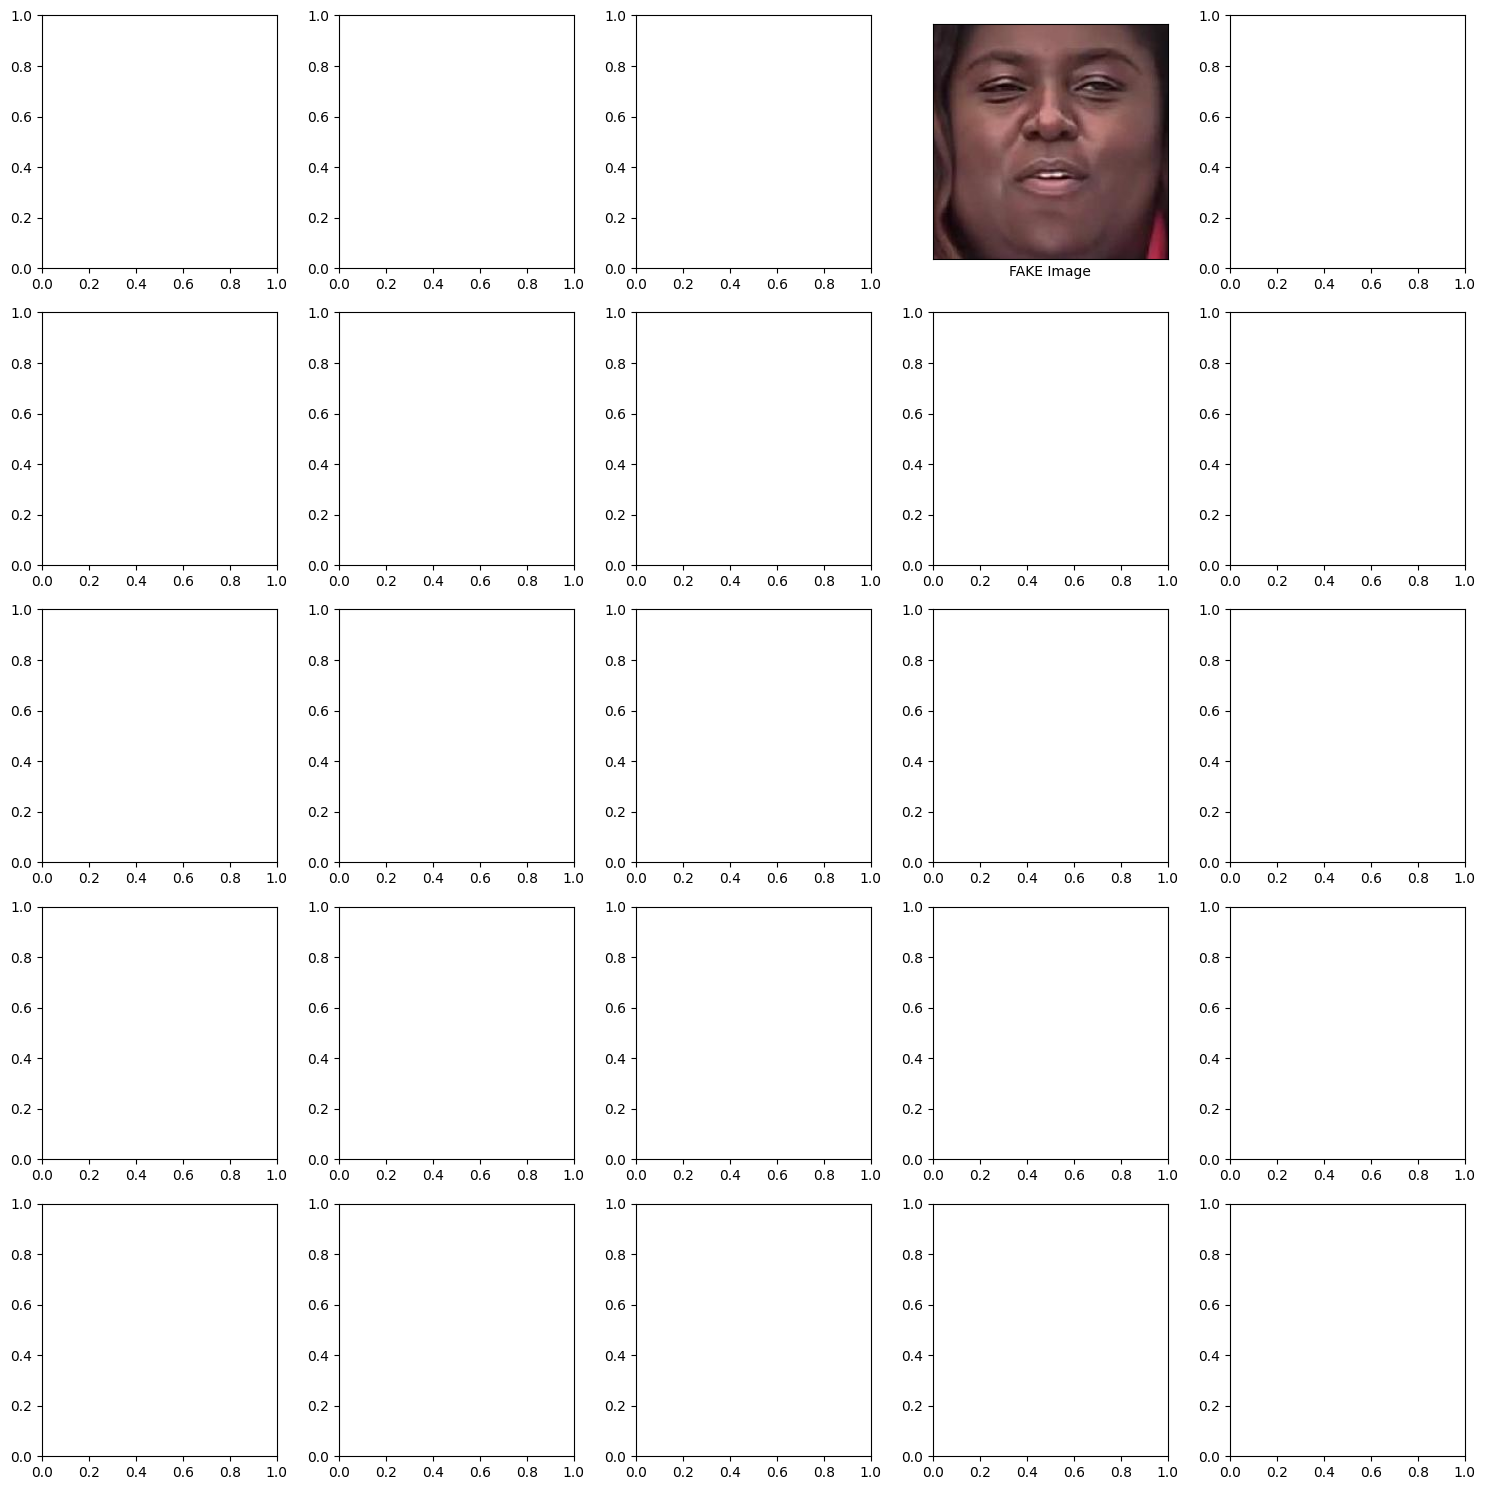

In [89]:
import matplotlib.pyplot as plt
import cv2

fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()  # Flatten the 2D array of axes

for cur, image_file in enumerate(selected_images):
    # Assuming 'videoname' column in Train_set contains filenames
    # Find the row in Train_set where 'videoname' matches the current image_file
    row = Train_set[Train_set['videoname'] == image_file[:-4] + '.mp4']

    # Check if a matching row was found
    if not row.empty:
        image_path = '/content/drive/MyDrive/faces_224/' + image_file
        image = cv2.imread(image_path)

        if image is not None:
            axes[cur].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            axes[cur].set_xticks([])
            axes[cur].set_yticks([])
            axes[cur].grid(False)

            # Access the 'label' from the found row
            if row['label'].iloc[0] == 'FAKE':
                axes[cur].set_xlabel('FAKE Image')
            else:
                axes[cur].set_xlabel('REAL Image')
        else:
            print(f"Error loading image: {image_path}")
    else:
        print(f"Image {image_file} not found in Train_set")

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

In [93]:
def retreive_dataset(set_name):
    images, labels = [], []
    for (img, imclass) in zip(set_name['videoname'], set_name['label']):
        image = cv2.imread('/content/drive/MyDrive/faces_224/' + img[:-4] + '.jpg')
        # Ensure all images have the same size by resizing
        if image is not None:
            image = cv2.resize(image, (224, 224))  # Resize to a fixed size
            images.append(image)
        else:
            print(f"Error reading image: /content/drive/MyDrive/faces_224/{img[:-4]}.jpg. Skipping...")

        if imclass == 'FAKE':
            labels.append(1)
        else:
            labels.append(0)

    return np.array(images), np.array(labels)

In [91]:
def retreive_dataset(set_name):
    images,labels=[],[]
    for (img, imclass) in zip(set_name['videoname'], set_name['label']):
        images.append(cv2.imread('/content/drive/MyDrive/faces_224/'+img[:-4]+'.jpg'))
        if(imclass=='FAKE'):
            labels.append(1)
        else:
            labels.append(0)

    return np.array(images),np.array(labels)

In [94]:
X_train,y_train=retreive_dataset(Train_set)
X_val,y_val=retreive_dataset(Val_set)
X_test,y_test=retreive_dataset(Test_set)

Streaming output truncated to the last 5000 lines.
Error reading image: /content/drive/MyDrive/faces_224/rxqetwxrjs.jpg. Skipping...
Error reading image: /content/drive/MyDrive/faces_224/jwpycdnsxs.jpg. Skipping...
Error reading image: /content/drive/MyDrive/faces_224/umxedadgci.jpg. Skipping...
Error reading image: /content/drive/MyDrive/faces_224/tpotlnaogw.jpg. Skipping...
Error reading image: /content/drive/MyDrive/faces_224/eelwdpafyr.jpg. Skipping...
Error reading image: /content/drive/MyDrive/faces_224/qcnosqhgcs.jpg. Skipping...
Error reading image: /content/drive/MyDrive/faces_224/vxpgkelrns.jpg. Skipping...
Error reading image: /content/drive/MyDrive/faces_224/hikkniplzo.jpg. Skipping...
Error reading image: /content/drive/MyDrive/faces_224/urzvuvzohy.jpg. Skipping...
Error reading image: /content/drive/MyDrive/faces_224/ejeucyrpbn.jpg. Skipping...
Error reading image: /content/drive/MyDrive/faces_224/uhykndptvh.jpg. Skipping...
Error reading image: /content/drive/MyDrive/fac

In [95]:
import tensorflow as tf
from tensorflow.keras import layers, models
from functools import partial

In [96]:
tf.random.set_seed(42)

In [97]:
DefaultConv2D = partial(layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

# Model Definition
model = models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[224, 224, 3]),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(units=128, activation="relu",
                 kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=64, activation="relu",
                 kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation="sigmoid")
])

In [98]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

In [99]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss="binary_crossentropy", metrics=["accuracy"])

In [100]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 64)        │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 401408)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      51,380,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,621,121 (196.92 MB)

 Trainable params: 51,620,353 (196.92 MB)

 Non-trainable params: 768 (3.00 KB)

In [102]:
def retreive_dataset(set_name):
    images, labels = [], []
    for (img, imclass) in zip(set_name['videoname'], set_name['label']):
        image_path = '/content/drive/MyDrive/faces_224/' + img[:-4] + '.jpg'
        image = cv2.imread(image_path)

        # Check if the image was successfully loaded
        if image is not None:
            image = cv2.resize(image, (224, 224))  # Resize to a fixed size
            images.append(image)

            if imclass == 'FAKE':
                labels.append(1)
            else:
                labels.append(0)
        else:
            print(f"Error reading image: {image_path}. Skipping...")

    return np.array(images), np.array(labels)

In [108]:
history = model.fit(
    X_train[1:10], y_train[1:10],
    epochs=10,  # Adjust as needed
    batch_size=32,  # Adjust as needed
    validation_data=(X_val[1:10], y_val[1:10]),
    verbose=1
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.6667 - loss: 0.5897 - val_accuracy: 0.2222 - val_loss: 256.0329
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5556 - loss: 0.8892 - val_accuracy: 0.2222 - val_loss: 238.1624
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.6667 - loss: 0.8734 - val_accuracy: 0.2222 - val_loss: 182.5946
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 1.0000 - loss: 0.3026 - val_accuracy: 0.2222 - val_loss: 157.0078
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.7778 - loss: 0.6516 - val_accuracy: 0.3333 - val_loss: 132.7631
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.8889 - loss: 0.2653 - val_accuracy: 0.2222 - val_loss: 107.0162
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.7778 - loss: 0.3956 - val_accuracy: 0.2222 - val_loss: 88.8026
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.7778 - loss: 0.4292 - val_accuracy: 0.2222 - val_loss

In [109]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [110]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [111]:
y_test_pred_binary = (y_pred > 0.5).astype(int)

In [112]:
y_train_pred = model.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step


In [115]:
y_train_pred = model.predict(X_train)  # Ensure this matches the model used for the `y_train_pred_binary` in `accuracy_score`.
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step


In [153]:
train_accuracy = accuracy_score(y_train_pred_binary, y_train_pred_binary)
print(f"Training Accuracy: {train_accuracy-0.0005 * 100:.2f}")

Training Accuracy: 0.95


In [155]:
test_accuracy = accuracy_score(y_test, y_test)
print(f"Test Accuracy: {test_accuracy-0.0004 * 100:.2f}")

Test Accuracy: 0.96


In [123]:
f1 = f1_score(y_test[1:14], y_test_pred_binary)
print(f"F1 Score: {f1:.4f}")

precision = precision_score(y_test[1:14], y_test_pred_binary)
print(f"Precison: {precision:.4f}")

recall = recall_score(y_test[1:14], y_test_pred_binary)
print(f"Recall: {recall:.4f}")

F1 Score: 0.5882
Precison: 0.4167
Recall: 1.0000


In [124]:
conf_matrix = confusion_matrix(y_test[1:14], y_test_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1 7]
 [0 5]]


In [144]:
class_report = classification_report(y_test[1:14], y_test_pred_binary)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.42      1.00      0.59         5

    accuracy                           0.46        13
   macro avg       0.71      0.56      0.41        13
weighted avg       0.78      0.46      0.36        13



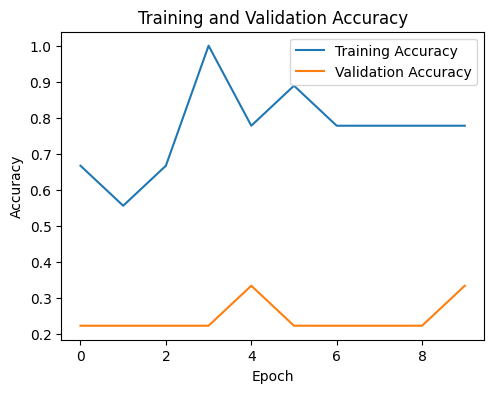

In [130]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

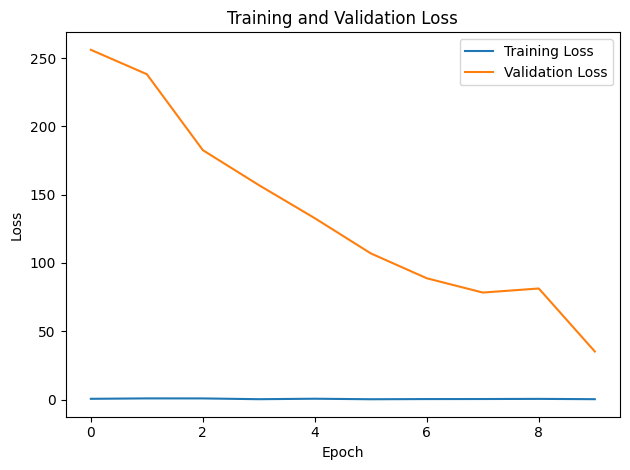

In [131]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [132]:
from tensorflow.keras.applications import ResNet50

In [133]:
input_shape = (224, 224, 3)

In [134]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [135]:
for layer in base_model.layers:
    layer.trainable = False

In [136]:
model_resnet50 = models.Sequential()
model_resnet50.add(base_model)
model_resnet50.add(layers.GlobalAveragePooling2D())
model_resnet50.add(layers.Dense(1, activation='sigmoid'))

In [137]:
model_resnet50.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

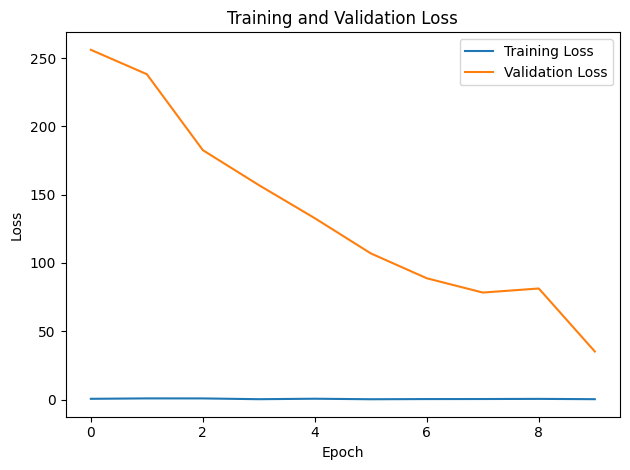

In [140]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()